# Motion Generation Example using RNN

- “Generative Choreography using Deep Learning”, Luka Crnkovic-Friis, Louise Crnkovic-Friis, 2016 (arXiv:[1605.06921](https://arxiv.org/abs/1605.06921))

<div style="border:1px solid black;border-radius:5px;">
<img  src="Screenshot-2017-10-10 21.59.19.png" style="width:85%"/>
</div>

## motion capture data sample

- CMU motion caption data
  - http://mocap.cs.cmu.edu
  - "Subject #94 (indian dance)"


<div style="border:1px solid black;border-radius:5px">
<img  src="screenshot-2017-10-10 22.38.19.png" style="width:85%"/>
</div>

In [1]:
%%bash
rm -fr data/input
rm -fr data/input2 data/input3
rm -fr data/input4 data/tmp
rm -fr save1 save2 save3 save4

In [2]:
%matplotlib inline
# coding: utf-8
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
import numpy as np
import matplotlib.pyplot as plt

# 모션데이터를 전처리 하여 csv 포맷으로 변환

- 모션 캡춰 데이터의 한 프레임에서 주요 관절의 3차원 좌표값 추출하여 차례로 기록
- 모션 캡춰 데이터 모든 프레임에 대해서 위 과정을 반복
- 주요관절의 아래 그림과 같이 선택
- csv 데이터의 하나의 row 에는 16개 관절 좌표의 x,y,z 값을 차례대로 기록 (전체 48개 column)

  $[x_1,y_1,z_1,x_2,y_2,z_2,...,x_{16},y_{16},z_{16}]$

<img  src="Office Lens 20170315-114605.jpg" style="width:25.5rem"/>

# 모션 데이터 예시

- data/mocap-thkim-3d/94_04_skeleton_3d.csv

In [3]:
data = np.loadtxt(
    'data/mocap-thkim-3d/94_04_skeleton_3d.csv',
    delimiter=',')
data.shape

(716, 48)

In [4]:
import pandas as pd
df = pd.DataFrame(data)
colnames = [a+str(b)
            for b in range(1,17)
            for a in ['x_','y_','z_'] ]
df.columns = colnames
df

,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,...,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16
0,1.882192,756.66960,144.147340,-31.925642,697.06940,107.631160,2.947209,612.67370,135.638760,34.296173,...,139.783200,40.641750,529.13544,133.434360,96.731445,536.89355,127.418090,143.348240,539.78750,108.158070
1,1.883342,756.67890,144.150670,-31.815847,697.03030,107.629860,2.925327,612.62990,135.757220,34.277992,...,139.800600,40.507070,528.98890,133.398450,96.591930,536.74990,127.115290,143.040300,539.52080,107.668594
2,1.890642,756.70060,144.164610,-31.691278,696.98720,107.639490,2.868430,612.55550,135.864960,34.232185,...,139.847580,40.314100,528.78600,133.408550,96.390560,536.48785,126.824196,142.635900,539.02673,107.095634
3,1.888782,756.71560,144.184250,-31.598267,696.93536,107.655106,2.786905,612.44257,135.951280,34.147907,...,139.960880,40.074300,528.53980,133.519910,96.161030,536.07020,126.602290,142.062730,538.21470,106.223015
4,1.897167,756.73083,144.202870,-31.539127,696.90410,107.680260,2.652850,612.30470,135.995930,34.002270,...,140.124590,39.844486,528.27250,133.786800,95.996840,535.49530,126.605300,141.206730,537.05646,104.776040
5,1.907214,756.74603,144.215380,-31.534208,696.90234,107.715510,2.428106,612.15247,135.975860,33.773770,...,140.286300,39.658012,528.01450,134.240040,95.932014,534.91360,127.045570,139.763100,535.36816,102.445030
6,1.917874,756.75354,144.212880,-31.573100,696.93710,107.697930,2.118313,611.99350,135.884840,33.459087,...,140.438250,39.528910,527.84406,134.942030,95.964960,534.30050,128.099460,137.279890,533.20593,99.329430
7,1.939046,756.76056,144.198700,-31.622274,697.04020,107.598000,1.679518,611.82196,135.705230,33.007100,...,140.611130,39.470596,527.81460,135.931270,96.057890,533.49286,129.701770,133.333200,530.34436,95.796590
8,1.955456,756.77966,144.174730,-31.690561,697.20610,107.395930,1.066690,611.61840,135.402340,32.391884,...,140.804800,39.530420,527.94970,137.084800,96.207440,532.82430,131.793930,127.291150,526.88360,92.427120
9,1.951021,756.83026,144.160140,-31.695585,697.41925,107.128660,0.311084,611.37030,134.974040,31.626236,...,141.009580,39.837627,528.26870,138.264620,96.511284,533.10050,134.333020,119.524956,523.95040,90.500850


In [5]:
 df.describe()

,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,...,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,...,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,-3.518349,741.012391,60.978439,-19.462976,679.968872,32.958518,0.056131,600.204288,62.434984,26.862782,...,61.097423,33.549538,519.858532,54.575483,75.100271,538.917094,42.003280,84.269440,539.713016,13.780618
std,165.634351,26.224731,89.881845,156.700390,22.239540,82.227495,146.386340,8.990312,75.473049,143.782050,...,73.632009,140.454136,9.808761,73.498323,138.467280,21.915582,73.632606,144.419246,29.763978,76.342700
min,-247.948400,597.344400,-142.215590,-250.783620,573.122800,-132.474000,-225.342640,577.948600,-100.312800,-202.621830,...,-93.200900,-187.647230,496.256260,-111.802956,-215.436190,481.655760,-131.239720,-250.711170,438.495200,-173.020130
25%,-112.370794,738.313720,-4.724420,-122.785225,675.907575,-31.781075,-102.512824,594.751000,14.961355,-73.102469,...,18.868811,-68.097158,513.123850,15.751090,-16.730733,525.414705,11.363819,-5.073038,524.045075,-23.402138
50%,-2.874052,751.471200,81.822103,-27.833915,685.672270,44.818014,-3.201898,599.928650,73.309487,27.332866,...,68.175155,31.195121,519.066850,59.247013,82.080195,537.110470,39.421199,101.309670,540.330135,15.580253
75%,10.579322,756.158225,118.554532,-8.219873,692.030925,100.865803,16.894174,606.118575,113.263563,47.657844,...,118.130209,56.750931,527.074637,106.181393,108.103715,550.945915,88.244852,147.673450,554.455445,60.773533
max,436.693760,759.918150,214.190540,420.481050,711.845030,176.197020,397.553680,620.227660,207.668530,379.701800,...,183.780470,377.005700,548.837770,204.802760,408.526430,605.322900,192.355090,409.548300,621.297850,231.120710


# 모션데이터 시각화 - 주요 좌표들의 변화 plot

- 신체중심 (골반) x,y,z 좌표의 변화
- 기타 주요 단말 (손,발,정수리) x,y,z 좌표의 변화
- 200 스텝까지의 변화와, 그 이후 데이터 전체의 변화를 관찰

In [6]:
def plot_motion(data, vlim=5.5):
    if type(data) is str or type(data) is unicode:
        data = np.loadtxt(data,delimiter=',')

    cols0 = [18,19,20] # 골반 = (7)

    cols = np.concatenate([
        [0,1,2],       # 오른쪽 발 = (0)
        [15,16,17],    # 왼쪽 발   = (6)
        [27,28,29],    # 정수리    = (10)
        [30,31,32],    # 오른손    = (11)
        [45,46,47],    # 왼손      = (16)
    ])

    plt.figure(figsize=(13.5, 3.5))
    
    # 앞에서부터 500 스텝만 plot
    plt.subplot(2,2,1)
    plt.ylim(-vlim, vlim)
    plt.plot(range(200),data[:200,cols0])
    
    plt.subplot(2,2,3)
    plt.ylim(-vlim, vlim)
    plt.plot(range(200),data[:200,cols])

    # 나머지 스텝 plot
    plt.subplot(2,2,2)
    plt.ylim(-vlim, vlim)
    plt.plot(range(200,len(data)),data[200:,cols0])

    plt.subplot(2,2,4)
    plt.ylim(-vlim, vlim)
    plt.plot(range(200,len(data)),data[200:,cols])

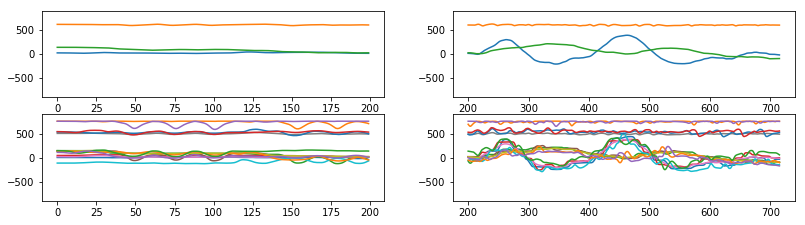

In [7]:
plot_motion('data/mocap-thkim-3d/94_04_skeleton_3d.csv',
            vlim=900)

# 모션 데이터 시각화 - 애니메이션

- Javascript + Processing.js 기반의 간단한 3D 애니메이션 뷰어
- Jupyter Notebook 의 HTML 렌더링 기능을 이용

In [8]:
def show_motion(filename):
    from IPython.core.display import HTML, display
    html="""
<iframe
    style="width:440px;height:440px;border:0"
    src="BodyViewerJs/index.html#../{filename:s}">
</iframe>
"""
    display(HTML(html.format(filename=filename)))

In [9]:
show_motion('data/mocap-thkim-3d/94_04_skeleton_3d.csv')

In [10]:
!ls data/mocap-thkim-3d/

94_01_skeleton_3d.csv  94_05_skeleton_3d.csv  94_09_skeleton_3d.csv
94_02_skeleton_3d.csv  94_06_skeleton_3d.csv  94_10_skeleton_3d.csv
94_03_skeleton_3d.csv  94_07_skeleton_3d.csv  94_11_skeleton_3d.csv
94_04_skeleton_3d.csv  94_08_skeleton_3d.csv  94_12_skeleton_3d.csv


In [11]:
%%html
<a href="catalog.html" target="_">
click me!
</a>

# 학습을 위해서 학습 데이터를 정규화 하고, data/input 에 저장

- step #1: get means &amp; standard deviations for (multiple) input files
  - 입력파일(들) 에 포함된 좌표값들의 평균, 표준편차 계산 (관절별로 따로)


- step #2:
  - 위에서 구한 평균 분산을 이용해서 입력파일의 좌표를 변환
  - (좌표값 - 평균값) / 표준편차
  

In [12]:
# %pycat csv_stats.py

In [13]:
%%bash -e
# step #1: get means & standard deviations
python csv_stats.py \
    data/mocap-thkim-3d/94_04_skeleton_3d.csv \
    --mean_file data/input/mean.txt \
    --std_file data/input/std.txt

{'var_file': None, 'verbose': False, 'std_file': 'data/input/std.txt', 'mean_file': 'data/input/mean.txt', 'input_files': ['data/mocap-thkim-3d/94_04_skeleton_3d.csv']}
input: data/mocap-thkim-3d/94_04_skeleton_3d.csv
wrote: data/input/mean.txt
wrote: data/input/std.txt


In [14]:
# %pycat csv_normalize.py

In [15]:
%%bash -e
# step #2: normalize
#  (1) subtract with mean value
#  (2) divide by std value
python csv_normalize.py \
    --mean_file data/input/mean.txt \
    --std_file data/input/std.txt \
    data/mocap-thkim-3d/94_04_skeleton_3d.csv \
    data/input/04.csv 

{'scale': 1.0, 'std_file': 'data/input/std.txt', 'reverse': False, 'input_file': 'data/mocap-thkim-3d/94_04_skeleton_3d.csv', 'output_file': 'data/input/04.csv', 'mean_file': 'data/input/mean.txt', 'verbose': False}
normalize: data/mocap-thkim-3d/94_04_skeleton_3d.csv data/input/04.csv


# 역정규화 un-normalize

- normalize step
  - ( 좌표값 - 평균값 ) / 표준편차


- un-normalize step (reverse normalize)
  - 변환좌표값 * 표준편차 + 평균값



In [16]:
%%bash -e
# un-normalize step (reverse normalize)
# (1) multiply by std value
# (2) add mean value
python csv_normalize.py -r \
    --mean_file data/input/mean.txt \
    --std_file  data/input/std.txt \
    data/input/04.csv \
    data/tmp/rev-04.csv

{'scale': 1.0, 'std_file': 'data/input/std.txt', 'reverse': True, 'input_file': 'data/input/04.csv', 'output_file': 'data/tmp/rev-04.csv', 'mean_file': 'data/input/mean.txt', 'verbose': False}
un-normalize: data/input/04.csv data/tmp/rev-04.csv


# 변환 + 역변환 결과가 원본과 같은지 검사

In [17]:
%%bash -e
# compare original data with un-normalized data
python csv_compare.py \
    data/mocap-thkim-3d/94_04_skeleton_3d.csv \
    data/tmp/rev-04.csv

{'input2': 'data/tmp/rev-04.csv', 'input1': 'data/mocap-thkim-3d/94_04_skeleton_3d.csv'}
max square error: 6.72400000334e-09


# 훈련데이터의 구성

In [18]:
# %pycat dataloader.py

## prepare training data - `DataLoader` (`dataloader.py`)

```
    for dirname, _, filelist in os.walk(data_dir):
        for filename in filelist:
            filepath = join(dirname,filename)
            if filename.endswith('.csv'):
                logger.info(('loadtxt',filepath))

                data = np.loadtxt(filepath, delimiter=',')

                if augment_data > 1:
                    # mirror augment * xN augment
                    data = np.vstack([data, data[::-1]] * augment_data)
                    logger.info(('augment > 1','shape',data.shape))

                self.data.append(data)

    self.data_len  = [len(d) for d in self.data]
    self.data_prob = np.array(self.data_len, dtype=np.float32) / \
        np.sum(self.data_len, dtype=np.float32)
```

## prepare training data batch - `DataLoader` (`dataloader.py`)

```
    for _ in range(batch_size):
        data_choice = np.random.choice(range(len(self.data)),p=self.data_prob)
        data        = self.data[data_choice]
        index       = np.random.randint(0,len(data)-(seq_length+1))
        x           = data[index:index+seq_length,:]
        y           = data[index+1:index+1+seq_length,:]
        x_batch.append(x)
        y_batch.append(y)

        data_id     = self.data_id[data_choice]
        id_batch.append(data_id)
```

# 생성모형 정의

In [19]:
# %pycat model.py

## placeholders

```
    input_data = tf.placeholder(
        dtype=tf.float32,
        shape=[None, seq_length, NUM_OUTPUTS],
        name='input_data')
    target_data = tf.placeholder(
        dtype=tf.float32,
        shape=[None, seq_length, NUM_OUTPUTS],
        name='target_data')
    seq_length  = tf.placeholder(
        dtype=tf.int64,
        shape=[None],
        name='seq_length')
    motion_id   = tf.placeholder(
            dtype=tf.float32,
            shape=[None, ID_SIZE],
            name='mot_id')
    batch_size = tf.shape(seq_length)[0]
```

## RNN

```
    cell_list = \
        [new_cell(args, NUM_OUTPUTS, infer)] + \
        [new_cell(args, rnn_size, infer)] * (num_layers-1)
    cell = tf.contrib.rnn.MultiRNNCell(cell_list)
```

```
    motion_state = tf.layers.dense(motion_id,
                        rnn_size * 2 * num_layers)
    initial_state = tuple([
        tf.contrib.rnn.LSTMStateTuple(*tf.split(x, 2, axis=1))
        for x in tf.split(motion_state, num_layers, axis=1)])
```

```
    outputs, last_state = tf.nn.dynamic_rnn(
        cell,
        input_data,
        sequence_length=seq_length,
        initial_state = initial_state,
        dtype=tf.float32
    )
    output = tf.layers.dense(outputs, NUM_OUTPUTS)
```

## Loss &amp; Optimize

```
    # loss A MSE on relative coords
    loss = tf.losses.mean_squared_error(
                target_data,
                output)
```

## Sampling

<code>
    def sample(model, sess, num):

        prev_state   = sess.run(model.initial_state,{model.motion_id:[motion_id]})
        prev_vec     = np.zeros((1, 1, NUM_OUTPUTS), dtype=np.float32)
        strokes      = np.zeros((num, NUM_OUTPUTS), dtype=np.float32)
        output       = np.zeros(NUM_OUTPUTS, dtype=np.float32)

        for i in tqdm(range(num)):
            feed                = {
                model.input_data:    prev_vec,
                model.initial_state: prev_state,
                model.seq_length:    [1],
            }
            o_rest, next_state  = sess.run(
                [model.output, model.last_state],
                feed)
            strokes[i, :]       = o_rest[0]
            prev_vec[0, 0, :]   = o_rest[0, 0, :]
            prev_state          = next_state

        return strokes

</code>


# 학습 시작

In [20]:
# "Last executed 2017-10-10 22:06:10 in 10m 40s"
!python -u train.py \
    --rnn_type lstm \
    --data_dir data/input \
    --save_dir save1

INFO:dataloader:('checking:', 'data/input')
INFO:dataloader:('loadtxt', 'data/input/04.csv')
INFO:dataloader:('num_batches:', 616, 'batch_size:', 50, 'seq_length:', 100)
epoch 1, step 200, loss = 0.21686, elapsed = 0.119
epoch 1, step 400, loss = 0.07980, elapsed = 0.107
model saved to save1/model.ckpt-500
epoch 1, step 600, loss = 0.03650, elapsed = 0.109
INFO:dataloader:('num_batches:', 616, 'batch_size:', 50, 'seq_length:', 100)
epoch 2, step 800, loss = 0.02491, elapsed = 0.200
epoch 2, step 1000, loss = 0.01285, elapsed = 0.102
model saved to save1/model.ckpt-1000
epoch 2, step 1200, loss = 0.01183, elapsed = 0.205
INFO:dataloader:('num_batches:', 616, 'batch_size:', 50, 'seq_length:', 100)
epoch 3, step 1400, loss = 0.00697, elapsed = 0.099
model saved to save1/model.ckpt-1500
epoch 3, step 1600, loss = 0.00684, elapsed = 0.102
epoch 3, step 1800, loss = 0.00568, elapsed = 0.111
INFO:dataloader:('num_batches:', 616, 'batch_size:', 50, 'seq_length:', 100)
epoch 4, step 2000, loss 

In [21]:
#!python -mtensorboard.main --port 5000 --logdir save1:save1,save2:save2,save3:save3

# 학습된 네트웍을 이용해서 동작 생성

In [22]:
!python sample.py \
    --save_dir save1 \
    --motion_id 0,0,0,0,1 \
    --output_file data/tmp/sample_04.csv

loading model:  save1/model.ckpt-3080
100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 906.94it/s]


## 정규화된 입력을 학습했기 때문에, 사용하기 전에는 다시 역-정규화

In [23]:
!python csv_normalize.py -r \
    --mean_file data/input/mean.txt \
    --std_file data/input/std.txt \
    data/tmp/sample_04.csv \
    save1/sample_04.csv

{'scale': 1.0, 'std_file': 'data/input/std.txt', 'reverse': True, 'input_file': 'data/tmp/sample_04.csv', 'output_file': 'save1/sample_04.csv', 'mean_file': 'data/input/mean.txt', 'verbose': False}
un-normalize: data/tmp/sample_04.csv save1/sample_04.csv


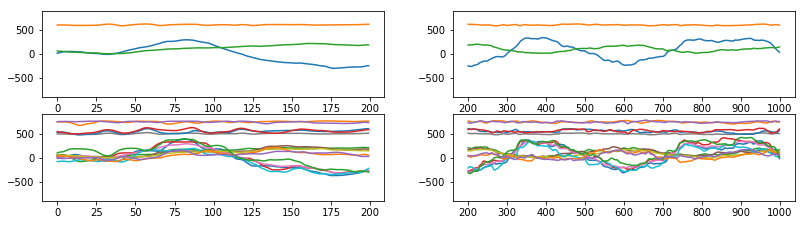

In [24]:
plot_motion('save1/sample_04.csv',
            vlim=900.0)

In [25]:
show_motion('save1/sample_04.csv')

# 데이터 포맷의 변경

- 인체 중심을 골반 (7번) 관절 기준으로
- 연결된 두 개 관절에서 중심 방향에 있는 관절을 기준으로
- 바깥 방향에 있는 관절은 중심방향에 있는 관절에 대한 상대좌표
- 중심좌표는 절대값을 그대로 사용

<img  src="Screenshot-2017-10-12 00.27.32.png" style="width:25.5rem"/>

In [26]:
# %pycat csv_motion_to_jrel2.py

<code>
    LINKS = (
        (7, 3), (3, 2), (2, 1), # 골반에서 우측 발까지
        (7, 4), (4, 5), (5, 6), # 골반에서 좌측 발까지
        (7, 8), (8, 9), (9, 10), # 골반에서 정수리까지
        (8, 13), (13, 12), (12, 11), # 명치에서 우측 손 끝 까지
        (8, 14), (14, 15), (15, 16), # 명치에서 좌측 손 끝 까지
    )


    def motion_to_jrel2_row(row):
        row = row[:3*N_JOINTS].reshape([-1,3])
        row_rel = np.zeros_like(row)
        j1, j2 = LINKS[0]
        row_rel[j1-1] = row[j1-1]
        for j1, j2 in LINKS:
            row_rel[j2-1] = row[j2-1] - row[j1-1]
        row = row_rel.reshape([-1])
        return row

    def jrel2_to_motion_row(row):
        row = row[:3*N_JOINTS].reshape([-1,3])
        for j1, j2 in LINKS:
            row[j2-1] = row[j2-1] + row[j1-1]
        row = row.reshape([-1])
        return row

</code>


## 상대좌표로 변환하고, 정규화

In [27]:
%%bash -e
python csv_motion_to_jrel2.py \
    data/mocap-thkim-3d/94_04_skeleton_3d.csv \
    data/tmp/__rel__.csv

python csv_stats.py \
    --mean_file /data/input2/mean.txt \
    --std_file /data/input2/std.txt \
    data/tmp/__rel__.csv

python csv_normalize.py \
    --mean_file /data/input2/mean.txt \
    --std_file /data/input2/std.txt \
    data/tmp/__rel__.csv \
    data/input2/04.csv

{'output_file': 'data/tmp/__rel__.csv', 'reverse': False, 'input_file': 'data/mocap-thkim-3d/94_04_skeleton_3d.csv'}
{'var_file': None, 'verbose': False, 'std_file': '/data/input2/std.txt', 'mean_file': '/data/input2/mean.txt', 'input_files': ['data/tmp/__rel__.csv']}
input: data/tmp/__rel__.csv
wrote: /data/input2/mean.txt
wrote: /data/input2/std.txt
{'scale': 1.0, 'std_file': '/data/input2/std.txt', 'reverse': False, 'input_file': 'data/tmp/__rel__.csv', 'output_file': 'data/input2/04.csv', 'mean_file': '/data/input2/mean.txt', 'verbose': False}
normalize: data/tmp/__rel__.csv data/input2/04.csv


## 학습시작

In [28]:
!python -u train.py \
    --save_dir save2 \
    --rnn_type lstm \
    --data_dir data/input2

INFO:dataloader:('checking:', 'data/input2')
INFO:dataloader:('loadtxt', 'data/input2/04.csv')
INFO:dataloader:('num_batches:', 616, 'batch_size:', 50, 'seq_length:', 100)
epoch 1, step 200, loss = 0.32935, elapsed = 0.136
epoch 1, step 400, loss = 0.17336, elapsed = 0.117
model saved to save2/model.ckpt-500
epoch 1, step 600, loss = 0.08954, elapsed = 0.133
INFO:dataloader:('num_batches:', 616, 'batch_size:', 50, 'seq_length:', 100)
epoch 2, step 800, loss = 0.05468, elapsed = 0.167
epoch 2, step 1000, loss = 0.03993, elapsed = 0.111
model saved to save2/model.ckpt-1000
epoch 2, step 1200, loss = 0.02360, elapsed = 0.107
INFO:dataloader:('num_batches:', 616, 'batch_size:', 50, 'seq_length:', 100)
epoch 3, step 1400, loss = 0.01700, elapsed = 0.113
model saved to save2/model.ckpt-1500
epoch 3, step 1600, loss = 0.01324, elapsed = 0.111
epoch 3, step 1800, loss = 0.01074, elapsed = 0.110
INFO:dataloader:('num_batches:', 616, 'batch_size:', 50, 'seq_length:', 100)
epoch 4, step 2000, los

In [29]:
#!python -mtensorboard.main --port 5000 --logdir save1:save1,save2:save2,save3:save3,save4:save4

## 학습된 모델을 이용하여 동작 생성

In [30]:
!python sample.py \
    --save_dir save2 \
    --motion_id 0,0,0,0,1 \
    --output_file data/tmp/sample_04-2.csv

loading model:  save2/model.ckpt-3080
100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 691.42it/s]


## 역 정규화 (un-normalization)

In [31]:
%%bash -e
python csv_normalize.py -r \
    --mean_file /data/input2/mean.txt \
    --std_file /data/input2/std.txt \
    data/tmp/sample_04-2.csv \
    data/tmp/__rel__.csv

python csv_motion_to_jrel2.py -r \
    data/tmp/__rel__.csv \
    save2/sample_04-2.csv

{'scale': 1.0, 'std_file': '/data/input2/std.txt', 'reverse': True, 'input_file': 'data/tmp/sample_04-2.csv', 'output_file': 'data/tmp/__rel__.csv', 'mean_file': '/data/input2/mean.txt', 'verbose': False}
un-normalize: data/tmp/sample_04-2.csv data/tmp/__rel__.csv
{'output_file': 'save2/sample_04-2.csv', 'reverse': True, 'input_file': 'data/tmp/__rel__.csv'}


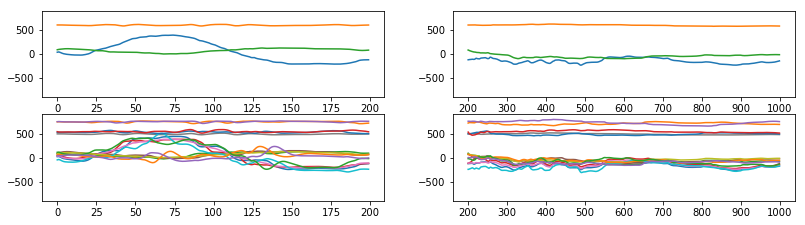

In [32]:
plot_motion('save2/sample_04-2.csv', 
            vlim=900.0)

In [33]:
show_motion('save2/sample_04-2.csv')

## Layer-normalized LSTM

In [ ]:
!python -u train.py \
    --save_dir save3 \
    --data_dir data/input2 \
    --rnn_type lnlstm

INFO:dataloader:('checking:', 'data/input2')
INFO:dataloader:('loadtxt', 'data/input2/04.csv')
('=== graph restored ===', u'save3/model.ckpt-1500')
INFO:dataloader:('num_batches:', 616, 'batch_size:', 50, 'seq_length:', 100)
model saved to save3/model.ckpt-1500
epoch 3, step 1600, loss = 0.00036, elapsed = 0.809


In [ ]:
!python sample.py \
    --save_dir save3 \
    --motion_id 0,0,0,0,1 \
    --output_file data/tmp/sample_04-3.csv

In [ ]:
%%bash -e
python csv_normalize.py -r \
    --mean_file /data/input2/mean.txt \
    --std_file /data/input2/std.txt \
    data/tmp/sample_04-3.csv \
    data/tmp/__rel__.csv

python csv_motion_to_jrel2.py -r \
    data/tmp/__rel__.csv \
    save3/sample_04-3.csv

In [ ]:
plot_motion('save3/sample_04-3.csv',
            vlim=900.0)

In [ ]:
show_motion('save3/sample_04-3.csv')

# 여러개 안무 동시 학습

In [42]:
!ls data/mocap-thkim-3d/

94_01_skeleton_3d.csv  94_05_skeleton_3d.csv  94_09_skeleton_3d.csv
94_02_skeleton_3d.csv  94_06_skeleton_3d.csv  94_10_skeleton_3d.csv
94_03_skeleton_3d.csv  94_07_skeleton_3d.csv  94_11_skeleton_3d.csv
94_04_skeleton_3d.csv  94_08_skeleton_3d.csv  94_12_skeleton_3d.csv


In [43]:
%%bash
for n in 01 02 03 04       # 05 06 07 08 09 10 11 12
do
    python csv_motion_to_jrel2.py \
        data/mocap-thkim-3d/94_${n}_skeleton_3d.csv \
        data/tmp/${n}-4.csv
done

python csv_stats.py \
    --mean_file data/input4/mean.txt \
    --std_file data/input4/std.txt \
    data/tmp/*-4.csv
    
for n in 01 02 03 04       # 05 06 07 08 09 10 11 12
do
    python csv_normalize.py \
        --mean_file data/input4/mean.txt \
        --std_file data/input4/std.txt \
        data/tmp/${n}-4.csv \
        data/input4/${n}.csv
done

{'output_file': 'data/tmp/01-4.csv', 'reverse': False, 'input_file': 'data/mocap-thkim-3d/94_01_skeleton_3d.csv'}
{'output_file': 'data/tmp/02-4.csv', 'reverse': False, 'input_file': 'data/mocap-thkim-3d/94_02_skeleton_3d.csv'}
{'output_file': 'data/tmp/03-4.csv', 'reverse': False, 'input_file': 'data/mocap-thkim-3d/94_03_skeleton_3d.csv'}
{'output_file': 'data/tmp/04-4.csv', 'reverse': False, 'input_file': 'data/mocap-thkim-3d/94_04_skeleton_3d.csv'}
{'var_file': None, 'verbose': False, 'std_file': 'data/input4/std.txt', 'mean_file': 'data/input4/mean.txt', 'input_files': ['data/tmp/01-4.csv', 'data/tmp/02-4.csv', 'data/tmp/03-4.csv', 'data/tmp/04-4.csv']}
input: data/tmp/01-4.csv
input: data/tmp/02-4.csv
input: data/tmp/03-4.csv
input: data/tmp/04-4.csv
wrote: data/input4/mean.txt
wrote: data/input4/std.txt
{'scale': 1.0, 'std_file': 'data/input4/std.txt', 'reverse': False, 'input_file': 'data/tmp/01-4.csv', 'output_file': 'data/input4/01.csv', 'mean_file': 'data/input4/mean.txt', 'v

In [44]:
!python -u train.py \
    --save_dir save4 \
    --data_dir data/input4 \
    --rnn_type lnlstm \
    --keep_prob 0.2 \
    --num_epochs 20

##  1 ~ 4 번 동작 생성

In [55]:
%%bash
set -e

for n in 1 2 3 4
do
    python sample.py \
        --save_dir save4 \
        --motion_id $n \
        --output_file data/tmp/samples-$n.csv

    python csv_normalize.py -r \
        --mean_file data/input4/mean.txt \
        --std_file data/input4/std.txt \
        data/tmp/samples-$n.csv \
        data/tmp/__rel__.csv

    python csv_motion_to_jrel2.py -r \
        data/tmp/__rel__.csv \
        save4/samples-$n.csv
done

loading model:  save4/model.ckpt-1500
100%|##########| 1000/1000 [00:02<00:00, 387.57it/s]
{'scale': 1.0, 'std_file': 'data/input4/std.txt', 'reverse': True, 'input_file': 'data/tmp/samples-1.csv', 'output_file': 'data/tmp/__rel__.csv', 'mean_file': 'data/input4/mean.txt', 'verbose': False}
un-normalize: data/tmp/samples-1.csv data/tmp/__rel__.csv
{'output_file': 'save4/samples-1.csv', 'reverse': True, 'input_file': 'data/tmp/__rel__.csv'}
loading model:  save4/model.ckpt-1500
100%|##########| 1000/1000 [00:02<00:00, 395.51it/s]
{'scale': 1.0, 'std_file': 'data/input4/std.txt', 'reverse': True, 'input_file': 'data/tmp/samples-2.csv', 'output_file': 'data/tmp/__rel__.csv', 'mean_file': 'data/input4/mean.txt', 'verbose': False}
un-normalize: data/tmp/samples-2.csv data/tmp/__rel__.csv
{'output_file': 'save4/samples-2.csv', 'reverse': True, 'input_file': 'data/tmp/__rel__.csv'}
loading model:  save4/model.ckpt-1500
100%|##########| 1000/1000 [00:02<00:00, 389.39it/s]
{'scale': 1.0, 'std_f

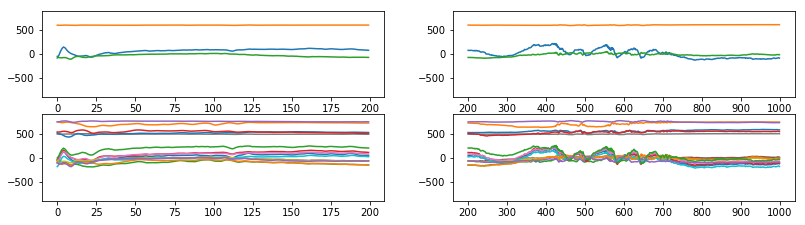

In [56]:
plot_motion('save4/samples-1.csv', vlim=900.0)

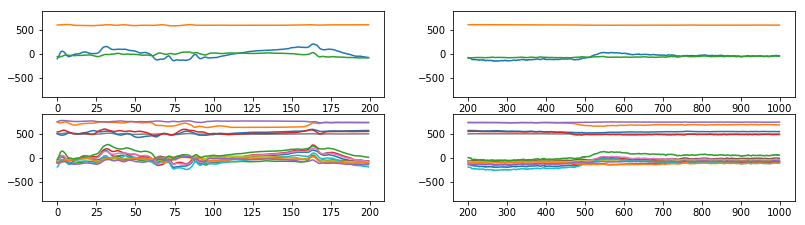

In [57]:
plot_motion('save4/samples-2.csv', vlim=900.0)

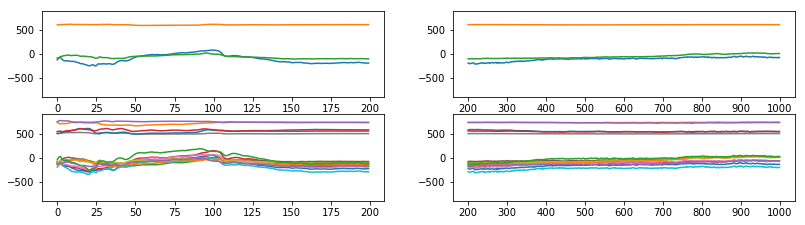

In [58]:
plot_motion('save4/samples-3.csv', vlim=900.0)

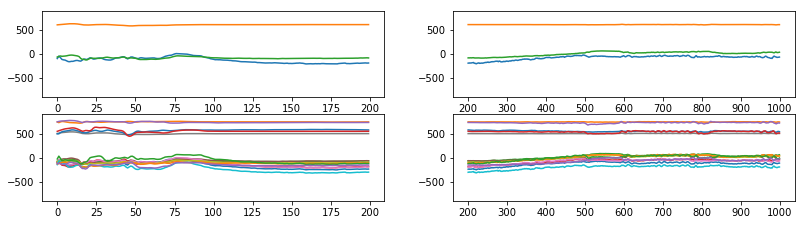

In [59]:
plot_motion('save4/samples-4.csv', vlim=900.0)

## 새로운 동작 테스트

In [60]:
%%bash -e
python sample.py \
    --save_dir save4 \
    --motion_id 0,0,0,1,1 \
    --output_file data/tmp/samples-3_4.csv

python csv_normalize.py -r \
    --mean_file data/input4/mean.txt \
    --std_file data/input4/std.txt \
    data/tmp/samples-3_4.csv \
    data/tmp/__rel__.csv

python csv_motion_to_jrel2.py -r \
    data/tmp/__rel__.csv \
    save4/samples-3_4.csv

loading model:  save4/model.ckpt-1500
100%|##########| 1000/1000 [00:02<00:00, 370.64it/s]
{'scale': 1.0, 'std_file': 'data/input4/std.txt', 'reverse': True, 'input_file': 'data/tmp/samples-3_4.csv', 'output_file': 'data/tmp/__rel__.csv', 'mean_file': 'data/input4/mean.txt', 'verbose': False}
un-normalize: data/tmp/samples-3_4.csv data/tmp/__rel__.csv
{'output_file': 'save4/samples-3_4.csv', 'reverse': True, 'input_file': 'data/tmp/__rel__.csv'}


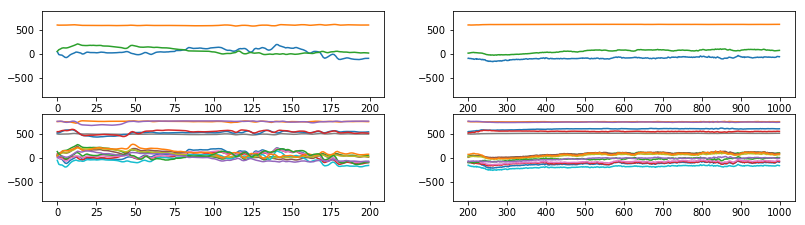

In [61]:
plot_motion('save4/samples-3_4.csv',
            vlim=900.0)

In [62]:
%%html
<a href="catalog-before-after.html" target="_">
click me!
</a>

# 참고문헌

- “Generating Sequences With Recurrent Neural Networks”, Alex Graves, 2013 (arXiv:[1308.0850](https://arxiv.org/abs/1308.0850))

- “Generative Choreography using Deep Learning”, Luka Crnkovic-Friis, Louise Crnkovic-Friis, 2016 (arXiv:[1605.06921](https://arxiv.org/abs/1605.06921))

- https://github.com/hardmaru/write-rnn-tensorflow ( [blog.otoro.net](http://blog.otoro.net/2015/12/12/handwriting-generation-demo-in-tensorflow/) )
